In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv(r"G:\Essentials\Hackathon PS\kaggle-titanic\train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train=train.rename(columns={'Pclass':'Ticket Class','SibSp':'No of sib/Spouses','Parch':'No of parents/children','Ticket':'Ticket no'})

In [8]:
train.head()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Ticket no,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Embarked :
    S=Southampton
    C=Cherbourg
    Q=Queenstown

In [9]:
train.shape

(891, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Ticket Class            891 non-null    int64  
 3   Name                    891 non-null    object 
 4   Sex                     891 non-null    object 
 5   Age                     714 non-null    float64
 6   No of sib/Spouses       891 non-null    int64  
 7   No of parents/children  891 non-null    int64  
 8   Ticket no               891 non-null    object 
 9   Fare                    891 non-null    float64
 10  Cabin                   204 non-null    object 
 11  Embarked                889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe(include='all')

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Ticket no,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taussig, Miss. Ruth",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
train.isnull().sum()

PassengerId                 0
Survived                    0
Ticket Class                0
Name                        0
Sex                         0
Age                       177
No of sib/Spouses           0
No of parents/children      0
Ticket no                   0
Fare                        0
Cabin                     687
Embarked                    2
dtype: int64

In [13]:
train.drop(['Cabin','Ticket no'],axis=1,inplace=True)

In [14]:
train.describe(include='all')
from scipy import stats

In [15]:
train['Embarked'].replace(np.nan,'S',inplace=True)

In [16]:
train['Age'].replace(np.nan,0,inplace=True)

In [17]:
train.isnull()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [18]:
train.dtypes

PassengerId                 int64
Survived                    int64
Ticket Class                int64
Name                       object
Sex                        object
Age                       float64
No of sib/Spouses           int64
No of parents/children      int64
Fare                      float64
Embarked                   object
dtype: object

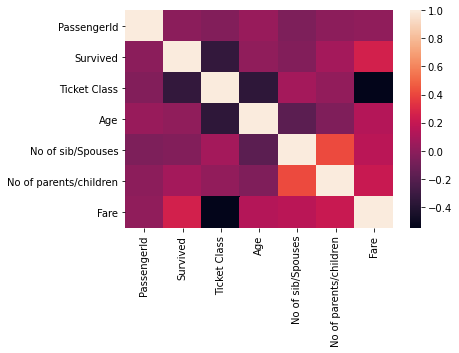

In [19]:
sns.heatmap(train.corr())

In [20]:
train.head()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


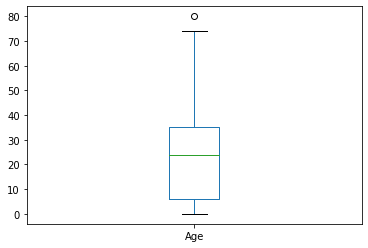

In [21]:
train['Age'].plot.box()

Text(0, 0.5, 'Frequency')

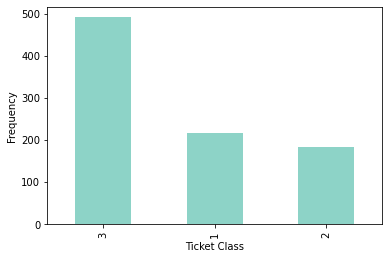

In [22]:
train['Ticket Class'].value_counts().plot(kind='bar',cmap='Set3')
plt.xlabel("Ticket Class")
plt.ylabel("Frequency")

# Maximum number of people belong to class 3

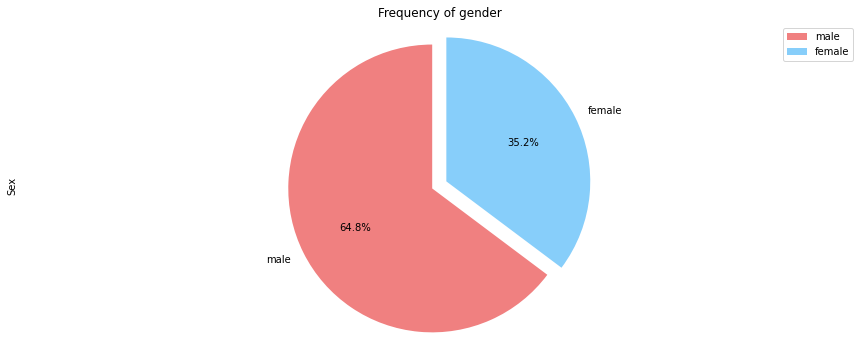

In [23]:
train['Sex'].value_counts().plot(kind='pie',
                                    autopct="%1.1f%%",
                                     startangle=90,
                                figsize=(15,6),
                                 explode=[0.1,0.01],
                                 colors=['lightcoral','lightskyblue']
                                   )
plt.axis('equal')
plt.title('Frequency of gender')
plt.legend()

Text(0.5, 1.0, 'Count of siblings and spouses ')

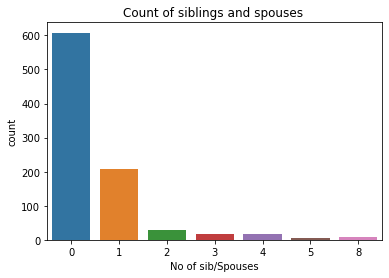

In [24]:
sns.countplot(train['No of sib/Spouses'])
plt.title("Count of siblings and spouses ")

Text(0.5, 1.0, 'Count of Parents and Children ')

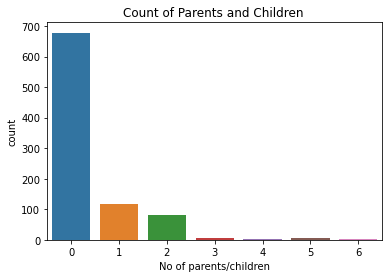

In [25]:
sns.countplot(train['No of parents/children'])
plt.title("Count of Parents and Children ")

([<matplotlib.axis.XTick at 0x26daff928d0>,
 <a list of 3 Text major ticklabel objects>)

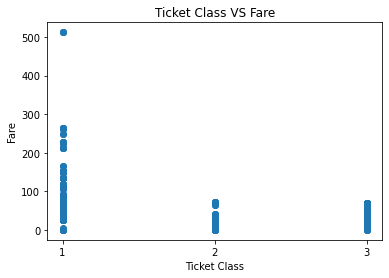

In [26]:
plt.scatter(x='Ticket Class',y='Fare',data=train)
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.title('Ticket Class VS Fare')
plt.xticks([1,2,3])

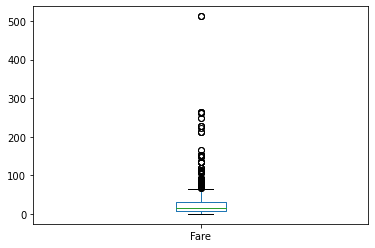

In [27]:
train['Fare'].plot.box()

In [28]:
train=train[train['Fare']<500]

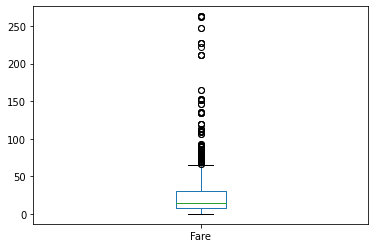

In [29]:
train['Fare'].plot.box()

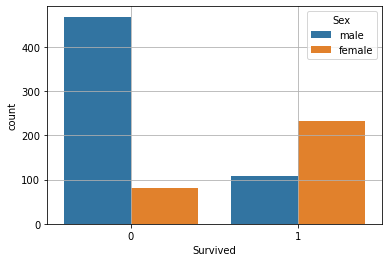

In [30]:
sns.countplot('Survived',hue='Sex',data=train)
plt.grid()

In [31]:
train['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

In [32]:
print('Percentage of people who didnt survived=',(549/train.shape[0]))
print('Percentage of people who  survived=',(339/train.shape[0]))

Percentage of people who didnt survived= 0.6182432432432432
Percentage of people who  survived= 0.38175675675675674


In [33]:
from imblearn.over_sampling import SMOTE

Text(0.5, 1.0, 'Count of Embarked')

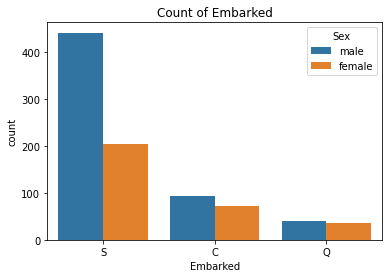

In [34]:
sns.countplot('Embarked',hue='Sex',data=train)
plt.title("Count of Embarked")

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
train.head()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [37]:
train['Sex']=train['Sex'].replace({'male':'1','female':'0'})

In [38]:
encoder=LabelEncoder()
train['Embarked']=encoder.fit(train['Embarked']).transform(train['Embarked'])

In [39]:
train.head()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [37]:
#train.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\clean.csv",index=False)

In [40]:
X=train[['Ticket Class','Sex','Age','No of sib/Spouses','No of parents/children','Embarked','Fare']]

In [ ]:
X_new=train[['Ticket Class','Sex','Age','No of sib/Spouses','No of parents/children','Embarked','Fare']]

In [41]:
y=train['Survived']

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit(X).transform(X)

In [41]:
sm=SMOTE(random_state=2)
X_train,y_train=sm.fit_sample(X,y.ravel())
print("Size of balanced X=",X_train.shape,"And size of balanced y=",y_train.shape)

Size of balanced X= (1098, 7) And size of balanced y= (1098,)


# 1.Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model1=LogisticRegression(C=0.01,solver='lbfgs',penalty='l2')
model1.fit(X,y)
y1=model1.predict(X)

In [44]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print('F1 Score=',f1_score(y,y1))
print('Classification Report=', classification_report(y,y1))

F1 Score= 0.724025974025974
Classification Report=               precision    recall  f1-score   support

           0       0.81      0.90      0.85       549
           1       0.81      0.66      0.72       339

    accuracy                           0.81       888
   macro avg       0.81      0.78      0.79       888
weighted avg       0.81      0.81      0.80       888



In [45]:
y1_prob=model1.predict_proba(X)

In [46]:
solvers=['liblinear','lbfgs','newton-cg']
penalty=['l1','l2']
c_values=[100,10,1.0,0.1,0.01]
grid=dict(solver=solvers,penalty=penalty,C=c_values)

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [48]:
print("Best Score=",grid_result.best_score_)
print("Best parameters=",grid_result.best_params_)

Best Score= 0.8014853592100782
Best parameters= {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [49]:
print(confusion_matrix(y,y1))

[[495  54]
 [116 223]]


# 2.Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model2=DecisionTreeClassifier()
model2.fit(X,y)
y2=model2.predict(X)

In [52]:
print('F1 Score=',f1_score(y,y2))
print('Classification Report=', classification_report(y,y2))
print(confusion_matrix(y,y2))

F1 Score= 0.9759759759759761
Classification Report=               precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       339

    accuracy                           0.98       888
   macro avg       0.98      0.98      0.98       888
weighted avg       0.98      0.98      0.98       888

[[547   2]
 [ 14 325]]


In [53]:
from sklearn import tree

[Text(163.5735008051718, 212.004, 'X[1] <= -0.309\ngini = 0.472\nsamples = 888\nvalue = [549, 339]'),
 Text(56.445929798356985, 201.132, 'X[0] <= 0.224\ngini = 0.384\nsamples = 313\nvalue = [81, 232]'),
 Text(26.003883495145633, 190.26, 'X[6] <= -0.042\ngini = 0.101\nsamples = 169\nvalue = [9, 160]'),
 Text(22.003286034353998, 179.388, 'X[6] <= -0.057\ngini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(20.00298730395818, 168.516, 'X[2] <= 1.831\ngini = 0.159\nsamples = 69\nvalue = [6, 63]'),
 Text(14.002091112770726, 157.644, 'X[3] <= -0.022\ngini = 0.138\nsamples = 67\nvalue = [5, 62]'),
 Text(8.001194921583272, 146.772, 'X[6] <= -0.421\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(6.000896191187454, 135.9, 'X[6] <= -0.431\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(4.000597460791636, 125.02799999999999, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(8.001194921583272, 125.02799999999999, 'X[2] <= 0.127\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(4.00

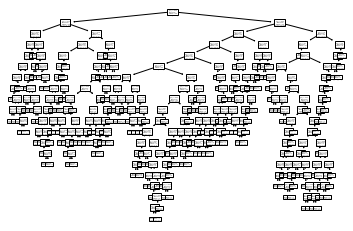

In [54]:
tree.plot_tree(model2)

# Hyperparameter Optimization

In [55]:
#criterion=['gini','entropy']
#splitter=['random','best']
#max_depth=range(1,30)
#min_samples_leaf=range(1,5)
#min_samples_split=range(1,10)

#param_grid={'criterion':criterion,
           #'splitter':splitter,
          # 'max_depth':max_depth,
           #'min_samples_leaf':min_samples_leaf,
           #'min_samples_split':min_samples_split}

#gridsearch=GridSearchCV(model2,param_grid,cv=5)

In [56]:
#randomsearch=RandomizedSearchCV(model2,param_grid,n_iter=100,cv=5)

In [57]:
#gridsearch.fit(X_train,y_train)

In [58]:
#randomsearch.fit(X_train,y_train)

In [59]:
#gridsearch.best_params_

In [60]:
#randomsearch.best_params_

In [61]:
#dtscore=randomsearch.score(X_train,y_train)
#dtscore1=gridsearch.score(X_train,y_train)
#print(dtscore)
#print(dtscore1)

# 3. Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X,y)
y3=model3.predict(X)

In [63]:
for i in range(0,888):
    if y3[i]>=.5:
        y3[i]=1
    else:
        y3[i]=0

In [64]:
y3

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [65]:
print('F1 Score=',f1_score(y,y3))
print('Classification Report=', classification_report(y,y3))
print(confusion_matrix(y,y3))

F1 Score= 0.9761904761904762
Classification Report=               precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.98      0.97      0.98       339

    accuracy                           0.98       888
   macro avg       0.98      0.98      0.98       888
weighted avg       0.98      0.98      0.98       888

[[544   5]
 [ 11 328]]


In [66]:
y3.shape

(888,)

# XgBoost

In [67]:
from xgboost import XGBClassifier
model4=XGBClassifier()
model4.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y4=model4.predict(X)
y4

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [69]:
print('F1 Score=',f1_score(y,y4))
print('Classification Report=', classification_report(y,y4))
print(confusion_matrix(y,y4))

F1 Score= 0.9531013615733737
Classification Report=               precision    recall  f1-score   support

           0       0.96      0.99      0.97       549
           1       0.98      0.93      0.95       339

    accuracy                           0.97       888
   macro avg       0.97      0.96      0.96       888
weighted avg       0.97      0.97      0.96       888

[[542   7]
 [ 24 315]]


# SVM

In [70]:
from sklearn.svm import SVC

In [71]:
model5=SVC(kernel='rbf',C=10,gamma=0.04)

In [72]:
model5.fit(X,y)
y5=model5.predict(X)

In [73]:
print('F1 Score=',f1_score(y,y5))
print('Classification Report=', classification_report(y,y5))
print(confusion_matrix(y,y5))

F1 Score= 0.7637540453074434
Classification Report=               precision    recall  f1-score   support

           0       0.83      0.92      0.87       549
           1       0.85      0.70      0.76       339

    accuracy                           0.84       888
   macro avg       0.84      0.81      0.82       888
weighted avg       0.84      0.84      0.83       888

[[506  43]
 [103 236]]


In [74]:
kernel=['rbf']

gamma=[0.03,0.003,0.004,0.04,0.01,1,10,100,2,3,]
c=[1.0,0.1,0.01,10,0.001,0.2,0.02,0.3,0.03]
grid1=dict(kernel=kernel,gamma=gamma,C=c)


In [75]:
grid_search_1 = GridSearchCV(estimator=model5, param_grid=grid1,cv=5)

In [76]:
grid_result_1 = grid_search_1.fit(X, y)

In [77]:
print("Best Score=",grid_result_1.best_score_)
print("Best parameters=",grid_result_1.best_params_)

Best Score= 0.823201929791151
Best parameters= {'C': 10, 'gamma': 0.04, 'kernel': 'rbf'}


# KNN

# Test set evaluation

In [49]:
test=pd.read_csv(r"G:\Essentials\Hackathon PS\kaggle-titanic\test.csv")

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
test.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [52]:
test=test.rename(columns={'Pclass':'Ticket Class','SibSp':'No of sib/Spouses','Parch':'No of parents/children'})

In [53]:
test.head()

,PassengerId,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [54]:
test.isnull().sum()

PassengerId                0
Ticket Class               0
Name                       0
Sex                        0
Age                       86
No of sib/Spouses          0
No of parents/children     0
Fare                       1
Embarked                   0
dtype: int64

In [55]:
test['Age'].replace(np.nan,0,inplace=True)

In [56]:
test['Fare'].replace(np.nan,0,inplace=True)

In [57]:
test['Sex']=test['Sex'].replace({'male':'1','female':'0'})
encoder=LabelEncoder()
test['Embarked']=encoder.fit(test['Embarked']).transform(test['Embarked'])

In [58]:
test.head()

,PassengerId,Ticket Class,Name,Sex,Age,No of sib/Spouses,No of parents/children,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2


In [59]:
X_test=test[['Ticket Class','Sex','Age','No of sib/Spouses','No of parents/children','Embarked','Fare']]

In [60]:
scaler=StandardScaler()
X_test=scaler.fit(X_test).transform(X_test)

In [61]:
sub=pd.read_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\gender_submission.csv")

In [62]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
dt_pred=model2.predict(X_test)
sub['Survived']=dt_pred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\dtpred.csv",index=False)

In [93]:
dt_pred.shape

(418,)

In [94]:
LR_pred=model1.predict(X_test)
sub['Survived']=LR_pred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\Lr.csv",index=False)

In [95]:
rf_pred=model3.predict(X_test)
sub['Survived']=rf_pred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\rf.csv",index=False)

In [96]:
xg_pred=model4.predict(X_test)
sub['Survived']=xg_pred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\xgb.csv",index=False)

In [97]:
svm_pred=model5.predict(X_test)
sub['Survived']=svm_pred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\svm.csv",index=False)

In [70]:
lgbpred=clf.predict(X_test)
sub['Survived']=lgbpred
sub.to_csv(r"C:\Users\ritik\Desktop\Hackathon PS\kaggle-titanic\lgb.csv",index=False)

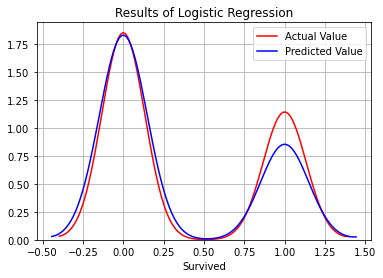

In [98]:
ax2=sns.distplot(y,hist=False,color='r',label='Actual Value')
sns.distplot(LR_pred,hist=False,color='b',label='Predicted Value',ax=ax2)
plt.title("Results of Logistic Regression")
plt.grid()
plt.show()
plt.close()

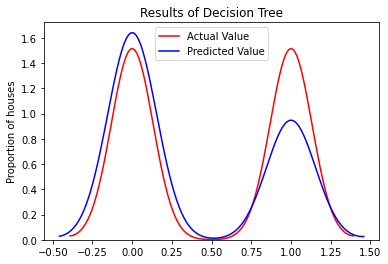

In [99]:
ax2=sns.distplot(y_train,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Predicted Value',ax=ax2)
plt.title("Results of Decision Tree")
plt.ylabel("Proportion of houses")
plt.show()
plt.close()

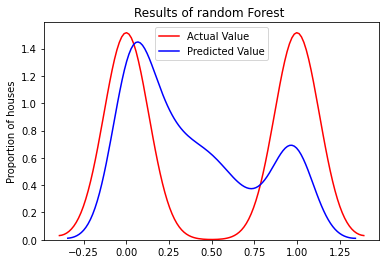

In [100]:
ax2=sns.distplot(y_train,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Predicted Value',ax=ax2)
plt.title("Results of random Forest ")
plt.ylabel("Proportion of houses")
plt.show()
plt.close()

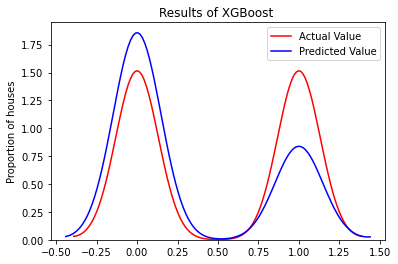

In [101]:
ax2=sns.distplot(y_train,hist=False,color='r',label='Actual Value')
sns.distplot(xg_pred,hist=False,color='b',label='Predicted Value',ax=ax2)
plt.title("Results of XGBoost ")
plt.ylabel("Proportion of houses")
plt.show()
plt.close()

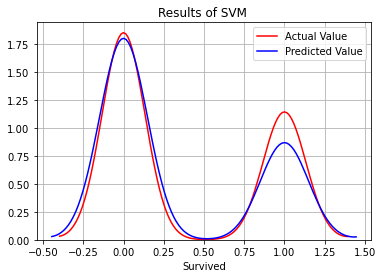

In [102]:
ax2=sns.distplot(y,hist=False,color='r',label='Actual Value')
sns.distplot(svm_pred,hist=False,color='b',label='Predicted Value',ax=ax2)
plt.title("Results of SVM ")
plt.grid()
plt.show()
plt.close()

# Out of all models SVM turned out to be the best with a score of 0.77 on test data

In [103]:
import pickle

In [104]:
pickle.dump(model5,open('model5.pkl','wb'))